# **PROYECTO FINAL**
# *Responsables: Cristhian Monroy & Óscar Uribe*

# Instalación de librerías

In [1]:
!pip install shapely
!pip install geopandas
!pip install pandas
!pip install rasterio
!pip install numpy
!pip install matplotlib

import shapely
import geopandas as gpd
import pandas as pd
import rasterio
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from matplotlib.patches import Patch
from shapely.geometry import Polygon, MultiPolygon
from shapely.validation import make_valid
from rasterio.features import rasterize
from rasterio.transform import from_bounds
from rasterio.mask import mask
from scipy.ndimage import gaussian_filter

# Desarrollo

## Expansión de la mancha urbana del conurbado

In [2]:
# Cargue de SHP de delimitación

municipios_girardot_flandes_ricaurte = r"C:\Users\crist\Desktop\MOUR\Tercer_semestre\Programación_SIG\Proyecto\Vectores\Delimitación\Municipios_Girardot_Flandes_Ricaurte.shp"
gdf_municipios_girardot_flandes_ricaurte = gpd.read_file(municipios_girardot_flandes_ricaurte)

conurbado = r"C:\Users\crist\Desktop\MOUR\Tercer_semestre\Programación_SIG\Proyecto\Vectores\Delimitación\Conurbado.shp"
gdf_conurbado = gpd.read_file(conurbado)

Manzanas_HU = r"C:\Users\crist\Desktop\MOUR\Tercer_semestre\Programación_SIG\Proyecto\Vectores\Huella Urbana\Manzanas_Conurbado.shp"
gdf_Manzanas_HU = gpd.read_file(Manzanas_HU)

In [3]:
# Cargue de los SHP restultantes del ejercicio de fotointerpretación

MU_1950 = r"C:\Users\crist\Desktop\MOUR\Tercer_semestre\Programación_SIG\Proyecto\Vectores\Huella Urbana\Fotointerpretación\MU_1950.shp"
gdf_MU_1950 = gpd.read_file(MU_1950)

MU_1960 = r"C:\Users\crist\Desktop\MOUR\Tercer_semestre\Programación_SIG\Proyecto\Vectores\Huella Urbana\Fotointerpretación\MU_1960.shp"
gdf_MU_1960 = gpd.read_file(MU_1960)

MU_1970 = r"C:\Users\crist\Desktop\MOUR\Tercer_semestre\Programación_SIG\Proyecto\Vectores\Huella Urbana\Fotointerpretación\MU_1970.shp"
gdf_MU_1970 = gpd.read_file(MU_1970)

MU_1980 = r"C:\Users\crist\Desktop\MOUR\Tercer_semestre\Programación_SIG\Proyecto\Vectores\Huella Urbana\Fotointerpretación\MU_1980.shp"
gdf_MU_1980 = gpd.read_file(MU_1980)

MU_1990 = r"C:\Users\crist\Desktop\MOUR\Tercer_semestre\Programación_SIG\Proyecto\Vectores\Huella Urbana\Fotointerpretación\MU_1990.shp"
gdf_MU_1990 = gpd.read_file(MU_1990)

MU_2000 = r"C:\Users\crist\Desktop\MOUR\Tercer_semestre\Programación_SIG\Proyecto\Vectores\Huella Urbana\Fotointerpretación\MU_2000.shp"
gdf_MU_2000 = gpd.read_file(MU_2000)

MU_2010 = r"C:\Users\crist\Desktop\MOUR\Tercer_semestre\Programación_SIG\Proyecto\Vectores\Huella Urbana\Fotointerpretación\MU_2010.shp"
gdf_MU_2010 = gpd.read_file(MU_2010)

In [6]:
# Realización de la intersección entre las manzanas del conurbado y los polígonos de expansión urbana delimitados en el ejercicio de fotointerpretación 

Intersección_1950 = gpd.overlay(gdf_Manzanas_HU, gdf_MU_1950, how='intersection')
Intersección_1950.to_file(r"C:\Users\crist\Desktop\MOUR\Tercer_semestre\Programación_SIG\Proyecto\Vectores\Resultados\Interseccion_HU_Manzanas\Manzanas_1950")

Intersección_1960 = gpd.overlay(gdf_Manzanas_HU, gdf_MU_1960, how='intersection')
Intersección_1960.to_file(r"C:\Users\crist\Desktop\MOUR\Tercer_semestre\Programación_SIG\Proyecto\Vectores\Resultados\Interseccion_HU_Manzanas\Manzanas_1960")

Intersección_1970 = gpd.overlay(gdf_Manzanas_HU, gdf_MU_1970, how='intersection')
Intersección_1970.to_file(r"C:\Users\crist\Desktop\MOUR\Tercer_semestre\Programación_SIG\Proyecto\Vectores\Resultados\Interseccion_HU_Manzanas\Manzanas_1970")

Intersección_1980 = gpd.overlay(gdf_Manzanas_HU, gdf_MU_1980, how='intersection')
Intersección_1980.to_file(r"C:\Users\crist\Desktop\MOUR\Tercer_semestre\Programación_SIG\Proyecto\Vectores\Resultados\Interseccion_HU_Manzanas\Manzanas_1980")

Intersección_1990 = gpd.overlay(gdf_Manzanas_HU, gdf_MU_1990, how='intersection')
Intersección_1990.to_file(r"C:\Users\crist\Desktop\MOUR\Tercer_semestre\Programación_SIG\Proyecto\Vectores\Resultados\Interseccion_HU_Manzanas\Manzanas_1990")

Intersección_2000 = gpd.overlay(gdf_Manzanas_HU, gdf_MU_2000, how='intersection')
Intersección_2000.to_file(r"C:\Users\crist\Desktop\MOUR\Tercer_semestre\Programación_SIG\Proyecto\Vectores\Resultados\Interseccion_HU_Manzanas\Manzanas_2000")

Intersección_2010 = gpd.overlay(gdf_Manzanas_HU, gdf_MU_2010, how='intersection')
Intersección_2010.to_file(r"C:\Users\crist\Desktop\MOUR\Tercer_semestre\Programación_SIG\Proyecto\Vectores\Resultados\Interseccion_HU_Manzanas\Manzanas_2010")

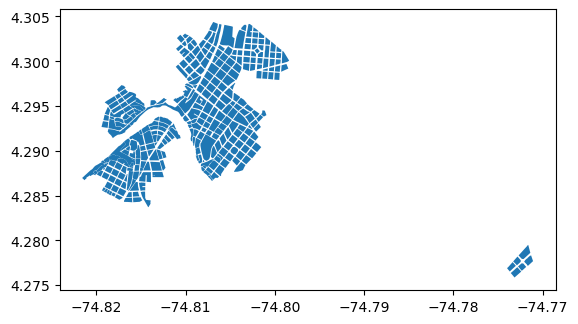

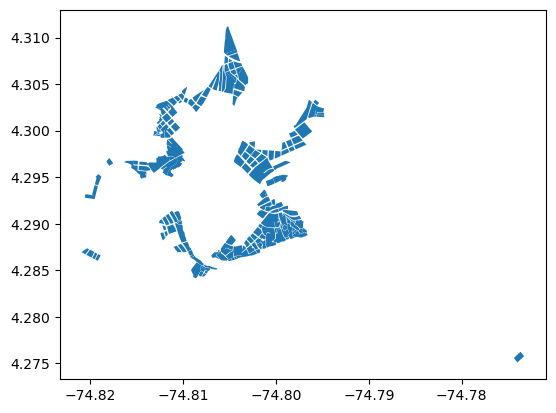

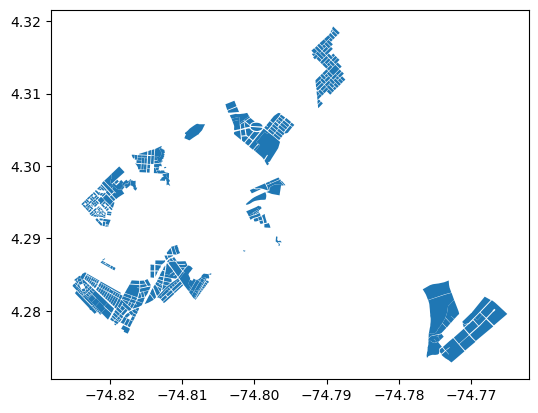

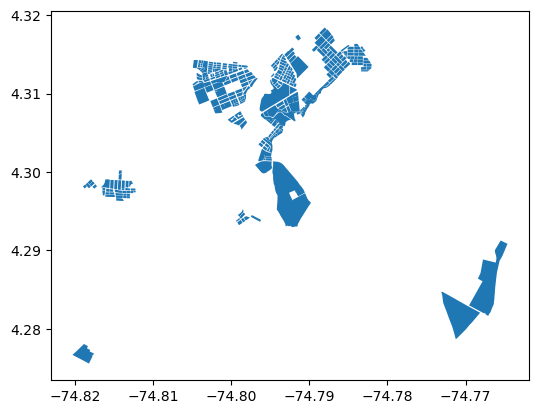

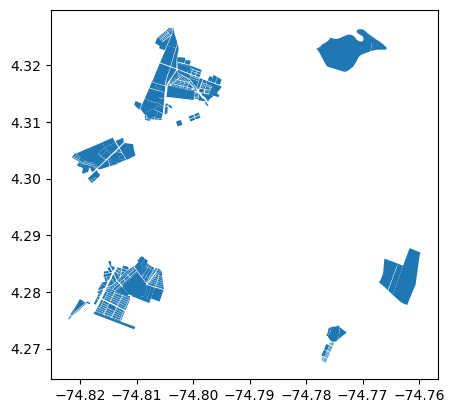

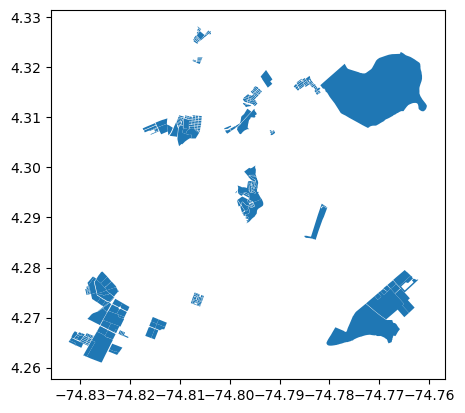

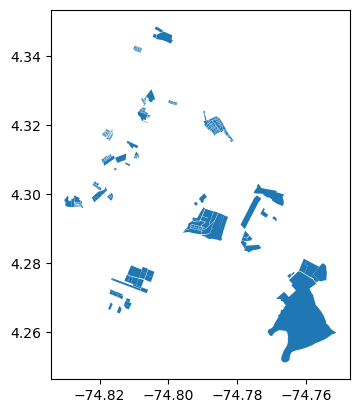

In [8]:
# Cargue y representación de las intersecciones

Manzanas_1950 = r"C:\Users\crist\Desktop\MOUR\Tercer_semestre\Programación_SIG\Proyecto\Vectores\Resultados\Interseccion_HU_Manzanas\Manzanas_1950"
gdf_Manzanas_1950 = gpd.read_file(Manzanas_1950)

gdf_Manzanas_1950.plot()

Manzanas_1960 = r"C:\Users\crist\Desktop\MOUR\Tercer_semestre\Programación_SIG\Proyecto\Vectores\Resultados\Interseccion_HU_Manzanas\Manzanas_1960"
gdf_Manzanas_1960 = gpd.read_file(Manzanas_1960)

gdf_Manzanas_1960.plot()

Manzanas_1970 = r"C:\Users\crist\Desktop\MOUR\Tercer_semestre\Programación_SIG\Proyecto\Vectores\Resultados\Interseccion_HU_Manzanas\Manzanas_1970"
gdf_Manzanas_1970 = gpd.read_file(Manzanas_1970)

gdf_Manzanas_1970.plot()

Manzanas_1980 = r"C:\Users\crist\Desktop\MOUR\Tercer_semestre\Programación_SIG\Proyecto\Vectores\Resultados\Interseccion_HU_Manzanas\Manzanas_1980"
gdf_Manzanas_1980 = gpd.read_file(Manzanas_1980)

gdf_Manzanas_1980.plot()

Manzanas_1990 = r"C:\Users\crist\Desktop\MOUR\Tercer_semestre\Programación_SIG\Proyecto\Vectores\Resultados\Interseccion_HU_Manzanas\Manzanas_1990"
gdf_Manzanas_1990 = gpd.read_file(Manzanas_1990)

gdf_Manzanas_1990.plot()

Manzanas_2000 = r"C:\Users\crist\Desktop\MOUR\Tercer_semestre\Programación_SIG\Proyecto\Vectores\Resultados\Interseccion_HU_Manzanas\Manzanas_2000"
gdf_Manzanas_2000 = gpd.read_file(Manzanas_2000)

gdf_Manzanas_2000.plot()

Manzanas_2010 = r"C:\Users\crist\Desktop\MOUR\Tercer_semestre\Programación_SIG\Proyecto\Vectores\Resultados\Interseccion_HU_Manzanas\Manzanas_2010"
gdf_Manzanas_2010 = gpd.read_file(Manzanas_2010)

gdf_Manzanas_2010.plot()

Manzanas_2020 = r"C:\Users\crist\Desktop\MOUR\Tercer_semestre\Programación_SIG\Proyecto\Vectores\Resultados\Interseccion_HU_Manzanas\Manzanas_2020"
gdf_Manzanas_2020 = gpd.read_file(Manzanas_2020)


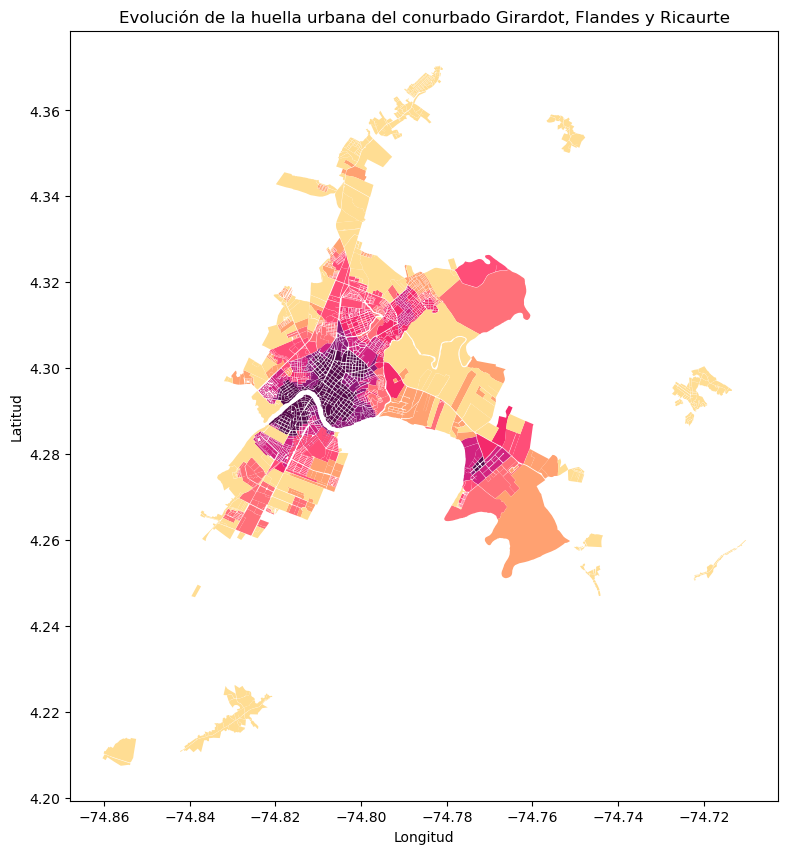

In [9]:
# Montaje de la cartografía conjunta

# Lista de rutas a los archivos shapefile
shapefile_paths = [
    r"C:\Users\crist\Desktop\MOUR\Tercer_semestre\Programación_SIG\Proyecto\Vectores\Resultados\Interseccion_HU_Manzanas\Manzanas_1950",
    r"C:\Users\crist\Desktop\MOUR\Tercer_semestre\Programación_SIG\Proyecto\Vectores\Resultados\Interseccion_HU_Manzanas\Manzanas_1960",
    r"C:\Users\crist\Desktop\MOUR\Tercer_semestre\Programación_SIG\Proyecto\Vectores\Resultados\Interseccion_HU_Manzanas\Manzanas_1970",
    r"C:\Users\crist\Desktop\MOUR\Tercer_semestre\Programación_SIG\Proyecto\Vectores\Resultados\Interseccion_HU_Manzanas\Manzanas_1980",
    r"C:\Users\crist\Desktop\MOUR\Tercer_semestre\Programación_SIG\Proyecto\Vectores\Resultados\Interseccion_HU_Manzanas\Manzanas_1990",
    r"C:\Users\crist\Desktop\MOUR\Tercer_semestre\Programación_SIG\Proyecto\Vectores\Resultados\Interseccion_HU_Manzanas\Manzanas_2000",
    r"C:\Users\crist\Desktop\MOUR\Tercer_semestre\Programación_SIG\Proyecto\Vectores\Resultados\Interseccion_HU_Manzanas\Manzanas_2010",
    r"C:\Users\crist\Desktop\MOUR\Tercer_semestre\Programación_SIG\Proyecto\Vectores\Resultados\Interseccion_HU_Manzanas\Manzanas_2020"
]

# Colores para cada capa
colores = ['#55094a', '#8e1876', '#d22380', '#f4296b', '#ff4e78', '#ff7079', '#ffa171', '#ffdd93']

# Cargue de los shapefiles
gdfs = [gpd.read_file(path) for path in shapefile_paths]

# Creación de una figura y ejes
fig, ax = plt.subplots(figsize=(10, 10))

# Representación de cada GeoDataFrame en el mismo mapa con diferentes colores y sin bordes
for gdf, color in zip(gdfs, colores):
    gdf.plot(ax=ax, color=color, edgecolor=None)

# Personalización del mapa
ax.set_title('Evolución de la huella urbana del conurbado Girardot, Flandes y Ricaurte')
ax.set_xlabel('Longitud')
ax.set_ylabel('Latitud')

# Mostrar el mapa
plt.show()

## Evolución de las coberturas de la tierra (Corine Land Cover)

In [10]:
# Cargue de la serie temporal de Corine Land Cover en formato SHP realizado por el IGAC (2000-2020)

CLC_2000 = r"C:\Users\crist\Desktop\MOUR\Tercer_semestre\Programación_SIG\Proyecto\Vectores\CLC\2000_2002.shp"
gdf_CLC_2000 = gpd.read_file(CLC_2000)

CLC_2005 = r"C:\Users\crist\Desktop\MOUR\Tercer_semestre\Programación_SIG\Proyecto\Vectores\CLC\2005_2009.shp"
gdf_CLC_2005 = gpd.read_file(CLC_2005)

CLC_2012 = r"C:\Users\crist\Desktop\MOUR\Tercer_semestre\Programación_SIG\Proyecto\Vectores\CLC\2010_2012.shp"
gdf_CLC_2012 = gpd.read_file(CLC_2012)

CLC_2020 = r"C:\Users\crist\Desktop\MOUR\Tercer_semestre\Programación_SIG\Proyecto\Vectores\CLC\2020.shp"
gdf_CLC_2020 = gpd.read_file(CLC_2020)

In [11]:
# Ajuste del sistema coordenado

gdf_CLC_2000 = gdf_CLC_2000.to_crs(gdf_municipios_girardot_flandes_ricaurte.crs)
gdf_CLC_2005 = gdf_CLC_2005.to_crs(gdf_municipios_girardot_flandes_ricaurte.crs)
gdf_CLC_2012 = gdf_CLC_2012.to_crs(gdf_municipios_girardot_flandes_ricaurte.crs)
gdf_CLC_2020 = gdf_CLC_2020.to_crs(gdf_municipios_girardot_flandes_ricaurte.crs)


In [12]:
# Intersección entre los SHP CLC y los límites municipales de Girardot, Flandes y Ricaurte

gdf_CLC_2000_recorte = gpd.clip(gdf_CLC_2000, gdf_municipios_girardot_flandes_ricaurte)
gdf_CLC_2005_recorte = gpd.clip(gdf_CLC_2005, gdf_municipios_girardot_flandes_ricaurte)
gdf_CLC_2012_recorte = gpd.clip(gdf_CLC_2012, gdf_municipios_girardot_flandes_ricaurte)
gdf_CLC_2020_recorte = gpd.clip(gdf_CLC_2020, gdf_municipios_girardot_flandes_ricaurte)


In [13]:
# Guardado de los SHP recortados

CLC_2000_Zona_Estudio = r"C:\Users\crist\Desktop\MOUR\Tercer_semestre\Programación_SIG\Proyecto\Vectores\Resultados\CLC\CLC_2000_Zona_Estudio.shp"
gdf_CLC_2000_recorte.to_file(CLC_2000_Zona_Estudio)

CLC_2005_Zona_Estudio = r"C:\Users\crist\Desktop\MOUR\Tercer_semestre\Programación_SIG\Proyecto\Vectores\Resultados\CLC\CLC_2005_Zona_Estudio.shp"
gdf_CLC_2005_recorte.to_file(CLC_2005_Zona_Estudio)

CLC_2012_Zona_Estudio = r"C:\Users\crist\Desktop\MOUR\Tercer_semestre\Programación_SIG\Proyecto\Vectores\Resultados\CLC\CLC_2012_Zona_Estudio.shp"
gdf_CLC_2012_recorte.to_file(CLC_2012_Zona_Estudio)

CLC_2020_Zona_Estudio = r"C:\Users\crist\Desktop\MOUR\Tercer_semestre\Programación_SIG\Proyecto\Vectores\Resultados\CLC\CLC_2020_Zona_Estudio.shp"
gdf_CLC_2020_recorte.to_file(CLC_2020_Zona_Estudio)



In [14]:
# Creación de una lista con los atributos requeridos para la realización del análisis

coberturas_urbanas = ["1.1.1. Tejido urbano continuo", "1.1.2. Tejido urbano discontinuo", "1.4.2. Instalaciones recreativas"]


In [15]:
# Filtro de los atributos en función de la lista previamente establecida

CLC_2000_filtro = gdf_CLC_2000_recorte[gdf_CLC_2000_recorte["Leyenda"].isin(coberturas_urbanas)]
CLC_2005_filtro = gdf_CLC_2005_recorte[gdf_CLC_2005_recorte["Leyenda_3_"].isin(coberturas_urbanas)]
CLC_2012_filtro = gdf_CLC_2012_recorte[gdf_CLC_2012_recorte["Leyenda_3_"].isin(coberturas_urbanas)]
CLC_2020_filtro = gdf_CLC_2020_recorte[gdf_CLC_2020_recorte["Leyenda"].isin(coberturas_urbanas)]

# Comprobación del filtro
print(CLC_2000_filtro.head())


     OBJECTID  Codigo                        Leyenda_3_  \
179     83049     142  1.4.2. Instalaciones recreativas   
115     82864     112  1.1.2. Tejido urbano discontinuo   
200     83116     142  1.4.2. Instalaciones recreativas   
267     83362     142  1.4.2. Instalaciones recreativas   
171     83015     142  1.4.2. Instalaciones recreativas   

                              Leyenda  Simbologia  st_area_sh  st_length_  \
179  1.4.2. Instalaciones recreativas          12    0.000023    0.019366   
115  1.1.2. Tejido urbano discontinuo           3    0.000099    0.071867   
200  1.4.2. Instalaciones recreativas          12    0.000023    0.019653   
267  1.4.2. Instalaciones recreativas          12    0.000198    0.074850   
171  1.4.2. Instalaciones recreativas          12    0.000412    0.140264   

                                              geometry  
179  POLYGON ((916794.563 963461.125, 916587.626 96...  
115  POLYGON ((919187.75 965562.75, 919187.563 9653...  
200  POLYGO

In [16]:
# Creación de diccionario para asignar un color a cada cobertura

colores = {
    "1.1.1. Tejido urbano continuo": "#a082e7",
    "1.1.2. Tejido urbano discontinuo": "#db8ae7",
    "1.4.2. Instalaciones recreativas": "#8aa3e7"
}


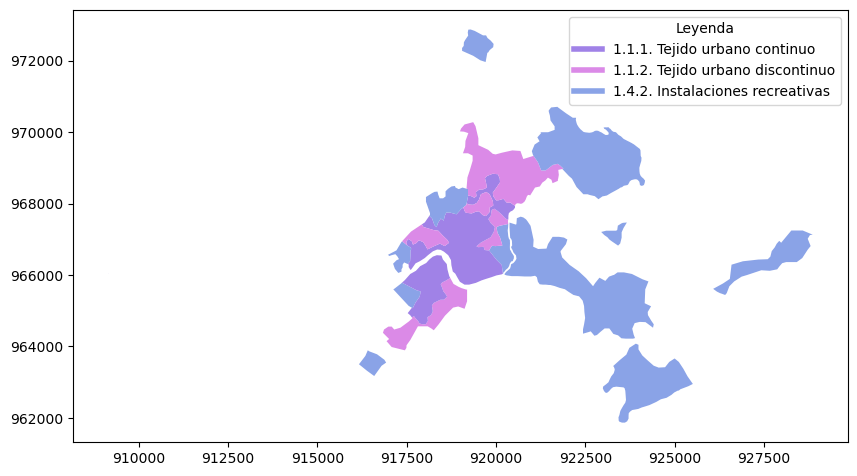

In [17]:
# Representación de la cobertura del suelo urbana en el año 2000

CLC_2000_filtro_copia = CLC_2000_filtro.copy()
CLC_2000_filtro_copia.loc[:, 'color'] = CLC_2000_filtro_copia['Leyenda'].map(colores)
fig, ax = plt.subplots(figsize=(10, 10))
CLC_2000_filtro_copia.plot(ax=ax, color=CLC_2000_filtro_copia['color'])

# Generación de leyenda

handles = [plt.Line2D([0, 0], [0, 1], color=color, lw=4) for color in colores.values()]
labels = colores.keys()
ax.legend(handles, labels, title='Leyenda')

plt.show()

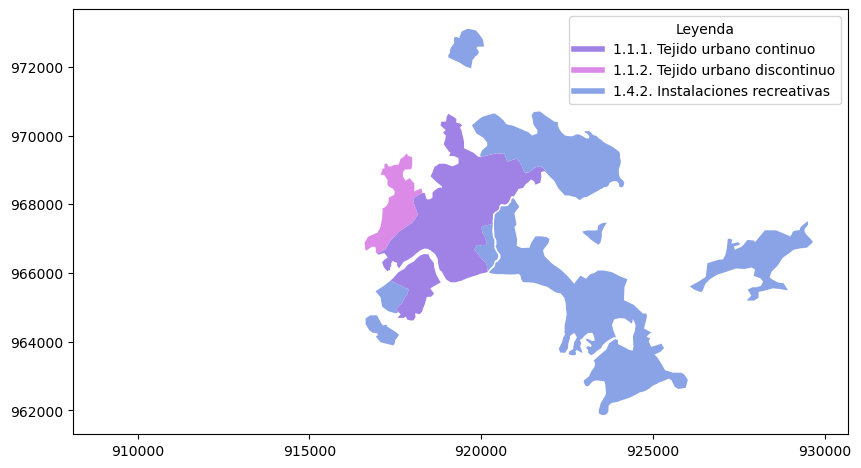

In [18]:
# Representación de la cobertura del suelo urbana en el año 2005

CLC_2005_filtro_copia = CLC_2005_filtro.copy()
CLC_2005_filtro_copia.loc[:, 'color'] = CLC_2005_filtro_copia['Leyenda'].map(colores)
fig, ax = plt.subplots(figsize=(10, 10))
CLC_2005_filtro_copia.plot(ax=ax, color=CLC_2005_filtro_copia['color'])

# Generación de leyenda

handles = [plt.Line2D([0, 0], [0, 1], color=color, lw=4) for color in colores.values()]
labels = colores.keys()
ax.legend(handles, labels, title='Leyenda')

plt.show()

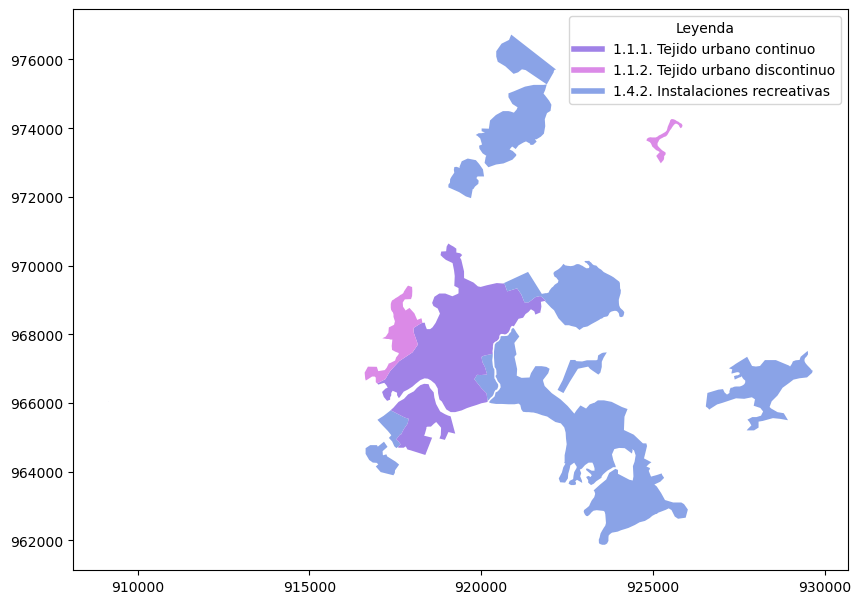

In [19]:
# Representación de la cobertura del suelo urbana en el año 2012

CLC_2012_filtro_copia = CLC_2012_filtro.copy()
CLC_2012_filtro_copia.loc[:, 'color'] = CLC_2012_filtro_copia['Leyenda_3_'].map(colores)
fig, ax = plt.subplots(figsize=(10, 10))
CLC_2012_filtro_copia.plot(ax=ax, color=CLC_2012_filtro_copia['color'])

# Generación de leyenda

handles = [plt.Line2D([0, 0], [0, 1], color=color, lw=4) for color in colores.values()]
labels = colores.keys()
ax.legend(handles, labels, title='Leyenda')

plt.show()

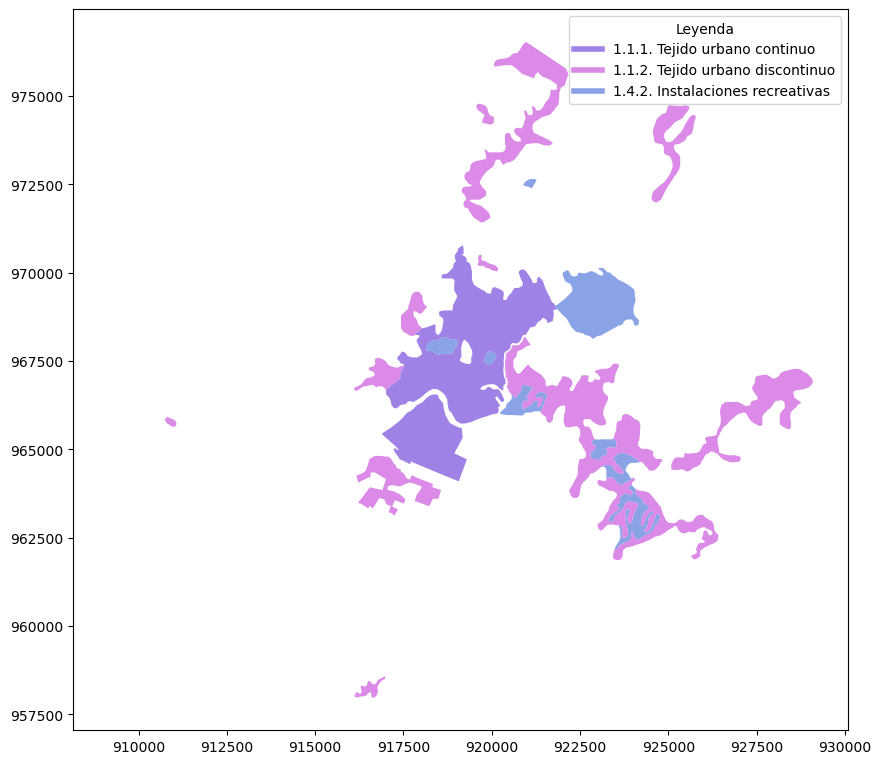

In [13]:
# Representación de la cobertura del suelo urbana en el año 2020

CLC_2020_filtro_copia = CLC_2020_filtro.copy()
CLC_2020_filtro_copia.loc[:, 'color'] = CLC_2020_filtro_copia['Leyenda'].map(colores)
fig, ax = plt.subplots(figsize=(10, 10))
CLC_2020_filtro_copia.plot(ax=ax, color=CLC_2020_filtro_copia['color'])

# Generación de leyenda

handles = [plt.Line2D([0, 0], [0, 1], color=color, lw=4) for color in colores.values()]
labels = colores.keys()
ax.legend(handles, labels, title='Leyenda')

plt.show()

In [21]:
# Cargue de la capa

Censo_Manzanas = r"C:\Users\crist\Desktop\MOUR\Tercer_semestre\Programación_SIG\Proyecto\Vectores\Censo\Censo_Manzanas.shp"
gdf_Censo_Manzanas = gpd.read_file(Censo_Manzanas)

In [24]:
# Realizar el recorte (intersección) sin descartar geometrías

Interseccion_Censo = gpd.overlay(gdf_Manzanas_HU, gdf_Censo_Manzanas, how='intersection', keep_geom_type=False)

In [25]:
# Filtrar solo geometrías de tipo POLYGON y MULTIPOLYGON

Interseccion_Censo = gdf_recorte[gdf_recorte.geometry.type.isin(['Polygon', 'MultiPolygon'])]

NameError: name 'gdf_recorte' is not defined

In [129]:
# Guardar el resultado en un nuevo shapefile

Censo_Conurbado = r"C:\Users\crist\Desktop\MOUR\Tercer_semestre\Programación_SIG\Proyecto\Vectores\Resultados\Censo_Conurbado"
Interseccion_Censo.to_file(Censo_Conurbado)

In [138]:
# Cargar el shapefile resultante del recorte
Censo_Conurbado = r"C:\Users\crist\Desktop\MOUR\Tercer_semestre\Programación_SIG\Proyecto\Vectores\Resultados\Censo_Conurbado"
gdf_Censo_Conurbado = gpd.read_file(Censo_Conurbado)

In [139]:
# Revisar el CRS actual
print(gdf_Censo_Conurbado.crs)

# Reproyectar las geometrías a un CRS proyectado (por ejemplo, EPSG:3857)
gdf_Censo_Conurbado = gdf_Censo_Conurbado.to_crs(epsg=3857)

EPSG:4326


In [140]:
# Filtrar las geometrías vacías o inválidas
gdf_Censo_Conurbado = gdf_Censo_Conurbado[gdf_Censo_Conurbado.geometry.is_valid & ~gdf_Censo_Conurbado.geometry.is_empty]

In [141]:
# Calcular los centroides
centroides = gdf_Censo_Conurbado.centroid

# Crear un nuevo GeoDataFrame para los centroides
gdf_centroides = gpd.GeoDataFrame(gdf_Censo_Conurbado.drop(columns='geometry'), geometry=centroides)

<Axes: >

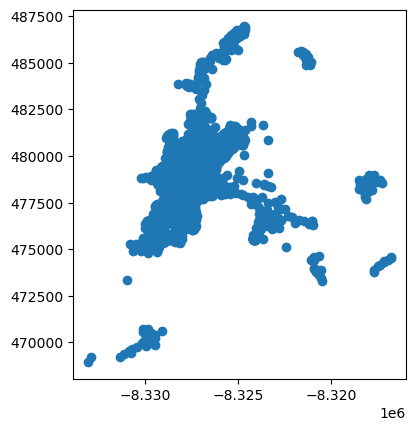

In [146]:
# Guardar los centroides en un nuevo shapefile
Censo_Conurbado_Centroides = r"C:\Users\crist\Desktop\MOUR\Tercer_semestre\Programación_SIG\Proyecto\Vectores\Resultados\Centroides_Censo_Conurbado"
gdf_centroides.to_file(Censo_Conurbado_Centroides)

gdf_centroides.plot()

In [163]:
# Cargar el shapefile de los centroides
Censo_Conurbado_Centroides = r"C:\Users\crist\Desktop\MOUR\Tercer_semestre\Programación_SIG\Proyecto\Vectores\Resultados\Centroides_Censo_Conurbado"
gdf_centroides = gpd.read_file(Censo_Conurbado_Centroides)

In [164]:
# Definir los parámetros del raster
pixel_size = 10  # Tamaño del píxel en unidades de coordenadas
bounds = gdf_centroides.total_bounds  # Extensión del raster
transform = from_bounds(*bounds, width=int((bounds[2] - bounds[0]) / pixel_size), height=int((bounds[3] - bounds[1]) / pixel_size))

# Crear una matriz vacía para el raster
raster = np.zeros((int((bounds[3] - bounds[1]) / pixel_size), int((bounds[2] - bounds[0]) / pixel_size)))

In [172]:
# Ponderar los puntos por la población
for index, row in gdf_centroides.iterrows():
    centroid = row.geometry
    personas = row["PERSONAS_S"] #Columna de almacena la cantidad de personas por manzana
    row_index, col_index = rasterio.transform.rowcol(transform, centroid.x, centroid.y)
    
    # Verificar si los índices están dentro de los límites de la matriz del raster
    if 0 <= row_index < raster.shape[0] and 0 <= col_index < raster.shape[1]:
        raster[row_index, col_index] += personas

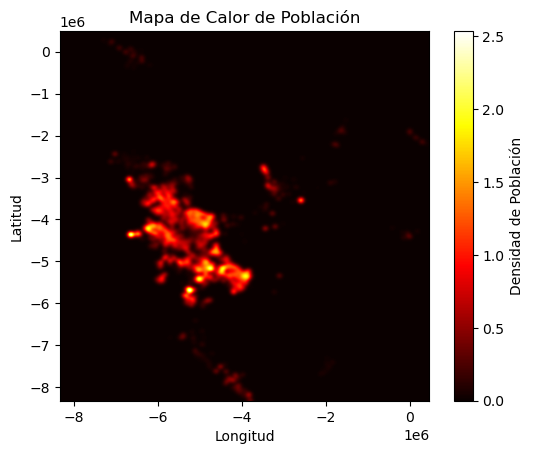

In [186]:
# Aplicar un filtro gaussiano para suavizar el raster (mapa de calor)
raster_gaussian = gaussian_filter(raster, sigma=10)

# Guardar el raster suavizado en un archivo TIFF
Poblacion_Conurbado = r"C:\Users\crist\Desktop\MOUR\Tercer_semestre\Programación_SIG\Proyecto\Vectores\Resultados\Poblacion_Conurbado.tif"
with rasterio.open(output_raster, 'w', driver='GTiff', height=raster_gaussian.shape[0], width=raster_gaussian.shape[1], count=1, dtype=raster_gaussian.dtype, crs=gdf_centroides.crs, transform=transform) as dst:
    dst.write(raster_gaussian, 1)


# Graficar el mapa de calor
plt.imshow(raster_gaussian, cmap='hot', extent=bounds, origin='lower')
plt.colorbar(label='Densidad de Población')
plt.title("Mapa de Calor de Población")
plt.xlabel("Longitud")
plt.ylabel("Latitud")


plt.show()

## Buffer rutas nacionales

In [26]:
# Cargar los shapefiles

Ruta_40 = r"C:\\Users\\crist\\Desktop\\MOUR\\Tercer_semestre\\Programación_SIG\\Proyecto\\Vectores\\Vias\\Ruta_40.shp"
gdf_Ruta_40 = gpd.read_file(Ruta_40)

Ruta_45 = r"C:\\Users\\crist\\Desktop\\MOUR\\Tercer_semestre\\Programación_SIG\\Proyecto\\Vectores\\Vias\\Ruta_45.shp"
gdf_Ruta_45 = gpd.read_file(Ruta_45)

In [28]:
# Crear un buffer de 1000 metros
buffer_Ruta_40 = gdf_Ruta_40.copy()
buffer_Ruta_40['geometry'] = gdf_Ruta_40.geometry.buffer(500)

buffer_Ruta_45 = gdf_Ruta_45.copy()
buffer_Ruta_45['geometry'] = gdf_Ruta_45.geometry.buffer(500)

# Guardar los buffers en nuevos archivos shapefile
buffer_Ruta_40.to_file(r"C:\Users\crist\Desktop\MOUR\Tercer_semestre\Programación_SIG\Proyecto\Vectores\Resultados\Ruta_40_Buffer")
buffer_Ruta_45.to_file(r"C:\Users\crist\Desktop\MOUR\Tercer_semestre\Programación_SIG\Proyecto\Vectores\Resultados\Ruta_45_Buffer")


<Axes: >

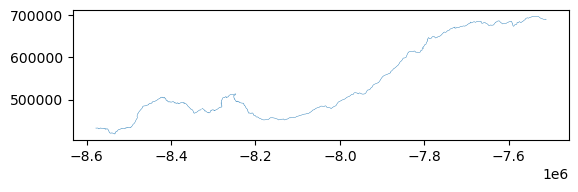

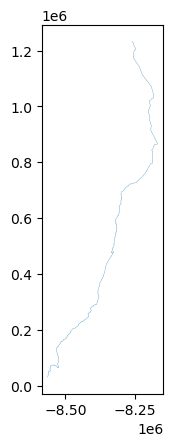

In [29]:
buffer_Ruta_40.plot()
buffer_Ruta_45.plot()

## Operaciones estadísticas

### CLC

In [32]:
# Cargue de los coberturas de la tierra resultado del ejercicio anterior

CLC_2000 = r"C:\Users\crist\Desktop\MOUR\Tercer_semestre\Programación_SIG\Proyecto\Vectores\Resultados\CLC\CLC_2000_Zona_Estudio.shp"
gdf_CLC_2000 = gpd.read_file(CLC_2000)

CLC_2005 = r"C:\Users\crist\Desktop\MOUR\Tercer_semestre\Programación_SIG\Proyecto\Vectores\Resultados\CLC\CLC_2005_Zona_Estudio.shp"
gdf_CLC_2005 = gpd.read_file(CLC_2005)

CLC_2012 = r"C:\Users\crist\Desktop\MOUR\Tercer_semestre\Programación_SIG\Proyecto\Vectores\Resultados\CLC\CLC_2012_Zona_Estudio.shp"
gdf_CLC_2012 = gpd.read_file(CLC_2012)

CLC_2020 = r"C:\Users\crist\Desktop\MOUR\Tercer_semestre\Programación_SIG\Proyecto\Vectores\Resultados\CLC\CLC_2020_Zona_Estudio.shp"
gdf_CLC_2020 = gpd.read_file(CLC_2020)


In [33]:
# Definición de las clases de interés

clases_interes = ["1.1.1. Tejido urbano continuo", "1.1.2. Tejido urbano discontinuo", "1.4.2. Instalaciones recreativas"] 


In [34]:
# Filtro del geodataframe por las clases de interés

gdf_filtrado_CLC_2000 = gdf_CLC_2000[gdf_CLC_2000["Leyenda"].isin(clases_interes)].copy() 
gdf_filtrado_CLC_2005 = gdf_CLC_2005[gdf_CLC_2005["Leyenda"].isin(clases_interes)].copy() 
gdf_filtrado_CLC_2012 = gdf_CLC_2012[gdf_CLC_2012["Leyenda_3_"].isin(clases_interes)].copy() 
gdf_filtrado_CLC_2020 = gdf_CLC_2020[gdf_CLC_2020["Leyenda"].isin(clases_interes)].copy()


In [35]:
# Calculo del área de cada polígono en metros cuadrados

gdf_filtrado_CLC_2000.loc[:, "area"] = gdf_filtrado_CLC_2000.geometry.area 
gdf_filtrado_CLC_2005.loc[:, "area"] = gdf_filtrado_CLC_2005.geometry.area 
gdf_filtrado_CLC_2012.loc[:, "area"] = gdf_filtrado_CLC_2012.geometry.area 
gdf_filtrado_CLC_2020.loc[:, "area"] = gdf_filtrado_CLC_2020.geometry.area 


In [36]:
# Conversión del área de metros cuadrados a kilómetros cuadrados

gdf_filtrado_CLC_2000.loc[:, "area_km2"] = gdf_filtrado_CLC_2000["area"] / 1_000_000
gdf_filtrado_CLC_2005.loc[:, "area_km2"] = gdf_filtrado_CLC_2005["area"] / 1_000_000
gdf_filtrado_CLC_2012.loc[:, "area_km2"] = gdf_filtrado_CLC_2012["area"] / 1_000_000
gdf_filtrado_CLC_2020.loc[:, "area_km2"] = gdf_filtrado_CLC_2020["area"] / 1_000_000


In [37]:
# Agrupación por la columna "Leyenda" y suma de las áreas en kilómetros cuadrados, redondeando a un decimal

superficie_CLC_2000 = gdf_filtrado_CLC_2000.groupby("Leyenda")["area_km2"].sum().round(1) 
superficie_CLC_2005 = gdf_filtrado_CLC_2005.groupby("Leyenda")["area_km2"].sum().round(1) 
superficie_CLC_2012 = gdf_filtrado_CLC_2012.groupby("Leyenda_3_")["area_km2"].sum().round(1) 
superficie_CLC_2020 = gdf_filtrado_CLC_2020.groupby("Leyenda")["area_km2"].sum().round(1) 


In [38]:
# Adición del "km²"

superficie_CLC_2000 = superficie_CLC_2000.astype(str) + " km²"
superficie_CLC_2005 = superficie_CLC_2005.astype(str) + " km²"
superficie_CLC_2012 = superficie_CLC_2012.astype(str) + " km²"
superficie_CLC_2020 = superficie_CLC_2020.astype(str) + " km²"


In [40]:
# Impresión de los resultados

print(superficie_CLC_2000)
print()
print(superficie_CLC_2005)
print()
print(superficie_CLC_2012)
print()
print(superficie_CLC_2020)


Leyenda
1.1.1. Tejido urbano continuo        4.7 km²
1.1.2. Tejido urbano discontinuo     5.1 km²
1.4.2. Instalaciones recreativas    15.9 km²
Name: area_km2, dtype: object

Leyenda
1.1.1. Tejido urbano continuo       10.4 km²
1.1.2. Tejido urbano discontinuo     2.0 km²
1.4.2. Instalaciones recreativas    20.1 km²
Name: area_km2, dtype: object

Leyenda_3_
1.1.1. Tejido urbano continuo       10.7 km²
1.1.2. Tejido urbano discontinuo     1.7 km²
1.4.2. Instalaciones recreativas    22.1 km²
Name: area_km2, dtype: object

Leyenda
1.1.1. Tejido urbano continuo       13.1 km²
1.1.2. Tejido urbano discontinuo    17.3 km²
1.4.2. Instalaciones recreativas     5.5 km²
Name: area_km2, dtype: object


### Expansión de la huella urbana

In [41]:
# Proyección de las geometrías a un CRS proyectado

gdf_Manzanas_1950 = gdf_Manzanas_1950.to_crs(epsg=3857)
gdf_Manzanas_1960 = gdf_Manzanas_1960.to_crs(epsg=3857)
gdf_Manzanas_1970 = gdf_Manzanas_1970.to_crs(epsg=3857)
gdf_Manzanas_1980 = gdf_Manzanas_1980.to_crs(epsg=3857)
gdf_Manzanas_1990 = gdf_Manzanas_1990.to_crs(epsg=3857)
gdf_Manzanas_2000 = gdf_Manzanas_2000.to_crs(epsg=3857)
gdf_Manzanas_2010 = gdf_Manzanas_2010.to_crs(epsg=3857)
gdf_Manzanas_2020 = gdf_Manzanas_2020.to_crs(epsg=3857)


In [42]:
# Cálculo del área total en metros cuadrados

gdf_Manzanas_1950["area"] = gdf_Manzanas_1950.geometry.area
area_total_m2_1950 = gdf_Manzanas_1950["area"].sum()

gdf_Manzanas_1960["area"] = gdf_Manzanas_1960.geometry.area
area_total_m2_1960 = gdf_Manzanas_1960["area"].sum()

gdf_Manzanas_1970["area"] = gdf_Manzanas_1970.geometry.area
area_total_m2_1970 = gdf_Manzanas_1970["area"].sum()

gdf_Manzanas_1980["area"] = gdf_Manzanas_1980.geometry.area
area_total_m2_1980 = gdf_Manzanas_1980["area"].sum()

gdf_Manzanas_1990["area"] = gdf_Manzanas_1990.geometry.area
area_total_m2_1990 = gdf_Manzanas_1990["area"].sum()

gdf_Manzanas_2000["area"] = gdf_Manzanas_2000.geometry.area
area_total_m2_2000 = gdf_Manzanas_2000["area"].sum()

gdf_Manzanas_2010["area"] = gdf_Manzanas_2010.geometry.area
area_total_m2_2010 = gdf_Manzanas_2010["area"].sum()

gdf_Manzanas_2020["area"] = gdf_Manzanas_2020.geometry.area
area_total_m2_2020 = gdf_Manzanas_2020["area"].sum()

In [43]:
# Conversión del área total a kilómetros cuadrados

area_total_km2_1950 = area_total_m2_1950 / 1_000_000
area_total_km2_1960 = area_total_m2_1960 / 1_000_000
area_total_km2_1970 = area_total_m2_1970 / 1_000_000
area_total_km2_1980 = area_total_m2_1980 / 1_000_000
area_total_km2_1990 = area_total_m2_1990 / 1_000_000
area_total_km2_2000 = area_total_m2_2000 / 1_000_000
area_total_km2_2010 = area_total_m2_2010 / 1_000_000
area_total_km2_2020 = area_total_m2_2010 / 1_000_000


In [44]:
# Aproximación del resultado a un decimal

area_total_km2_1950 = round(area_total_km2_1950, 2)
area_total_km2_1960 = round(area_total_km2_1960, 2)
area_total_km2_1970 = round(area_total_km2_1970, 2)
area_total_km2_1980 = round(area_total_km2_1980, 2)
area_total_km2_1990 = round(area_total_km2_1990, 2)
area_total_km2_2000 = round(area_total_km2_2000, 2)
area_total_km2_2010 = round(area_total_km2_2010, 2)
area_total_km2_2020 = round(area_total_km2_2020, 2)


In [45]:
# Impresión de resultados

print(f"El área total para 1950 es de {area_total_km2_1950} km².")
print()
print(f"El área total para 1960 es de {area_total_km2_1960} km².")
print()
print(f"El área total para 1970 es de {area_total_km2_1970} km².")
print()
print(f"El área total para 1980 es de {area_total_km2_1980} km².")
print()
print(f"El área total para 1990 es de {area_total_km2_1990} km².")
print()
print(f"El área total para 2000 es de {area_total_km2_2000} km².")
print()
print(f"El área total para 2010 es de {area_total_km2_2010} km².")
print()
print(f"El área total para 2020 es de {area_total_km2_2020} km².")

El área total para 1950 es de 1.85 km².

El área total para 1960 es de 1.06 km².

El área total para 1970 es de 2.5 km².

El área total para 1980 es de 1.89 km².

El área total para 1990 es de 3.63 km².

El área total para 2000 es de 6.22 km².

El área total para 2010 es de 6.62 km².

El área total para 2020 es de 6.62 km².


### Rutas nacionales

In [46]:
# Proyección de las geometrías a un CRS proyectado

buffer_Ruta_40 = buffer_Ruta_40.to_crs(epsg=3857)
buffer_Ruta_45 = buffer_Ruta_45.to_crs(epsg=3857)


In [47]:
# Cálculo de la intersección

interseccion_Ruta_40_1950 = gpd.overlay(gdf_Manzanas_1950, buffer_Ruta_40, how='intersection')
interseccion_Ruta_45_1950 = gpd.overlay(gdf_Manzanas_1950, buffer_Ruta_45, how='intersection')

interseccion_Ruta_40_1960 = gpd.overlay(gdf_Manzanas_1960, buffer_Ruta_40, how='intersection')
interseccion_Ruta_45_1960 = gpd.overlay(gdf_Manzanas_1960, buffer_Ruta_45, how='intersection')

interseccion_Ruta_40_1970 = gpd.overlay(gdf_Manzanas_1970, buffer_Ruta_40, how='intersection')
interseccion_Ruta_45_1970 = gpd.overlay(gdf_Manzanas_1970, buffer_Ruta_45, how='intersection')

interseccion_Ruta_40_1980 = gpd.overlay(gdf_Manzanas_1980, buffer_Ruta_40, how='intersection')
interseccion_Ruta_45_1980 = gpd.overlay(gdf_Manzanas_1980, buffer_Ruta_45, how='intersection')

interseccion_Ruta_40_1990 = gpd.overlay(gdf_Manzanas_1990, buffer_Ruta_40, how='intersection')
interseccion_Ruta_45_1990 = gpd.overlay(gdf_Manzanas_1990, buffer_Ruta_45, how='intersection')

interseccion_Ruta_40_2000 = gpd.overlay(gdf_Manzanas_2000, buffer_Ruta_40, how='intersection')
interseccion_Ruta_45_2000 = gpd.overlay(gdf_Manzanas_2000, buffer_Ruta_45, how='intersection')

interseccion_Ruta_40_2010 = gpd.overlay(gdf_Manzanas_2010, buffer_Ruta_40, how='intersection')
interseccion_Ruta_45_2010 = gpd.overlay(gdf_Manzanas_2010, buffer_Ruta_45, how='intersection')

interseccion_Ruta_40_2020 = gpd.overlay(gdf_Manzanas_2020, buffer_Ruta_40, how='intersection')
interseccion_Ruta_45_2020 = gpd.overlay(gdf_Manzanas_2020, buffer_Ruta_45, how='intersection')


In [48]:
# Cálculo del área de las intersecciones en metros cuadrados

interseccion_Ruta_40_1950["area"] = interseccion_Ruta_40_1950.geometry.area
area_total_m2_interseccion_Ruta_40_1950 = interseccion_Ruta_40_1950["area"].sum()
interseccion_Ruta_45_1950["area"] = interseccion_Ruta_45_1950.geometry.area
area_total_m2_interseccion_Ruta_45_1950 = interseccion_Ruta_45_1950["area"].sum()

interseccion_Ruta_40_1960["area"] = interseccion_Ruta_40_1960.geometry.area
area_total_m2_interseccion_Ruta_40_1960 = interseccion_Ruta_40_1960["area"].sum()
interseccion_Ruta_45_1960["area"] = interseccion_Ruta_45_1960.geometry.area
area_total_m2_interseccion_Ruta_45_1960 = interseccion_Ruta_45_1960["area"].sum()

interseccion_Ruta_40_1970["area"] = interseccion_Ruta_40_1970.geometry.area
area_total_m2_interseccion_Ruta_40_1970 = interseccion_Ruta_40_1970["area"].sum()
interseccion_Ruta_45_1970["area"] = interseccion_Ruta_45_1970.geometry.area
area_total_m2_interseccion_Ruta_45_1970 = interseccion_Ruta_45_1970["area"].sum()

interseccion_Ruta_40_1980["area"] = interseccion_Ruta_40_1980.geometry.area
area_total_m2_interseccion_Ruta_40_1980 = interseccion_Ruta_40_1980["area"].sum()
interseccion_Ruta_45_1980["area"] = interseccion_Ruta_45_1980.geometry.area
area_total_m2_interseccion_Ruta_45_1980 = interseccion_Ruta_45_1980["area"].sum()

interseccion_Ruta_40_1990["area"] = interseccion_Ruta_40_1990.geometry.area
area_total_m2_interseccion_Ruta_40_1990 = interseccion_Ruta_40_1990["area"].sum()
interseccion_Ruta_45_1990["area"] = interseccion_Ruta_45_1990.geometry.area
area_total_m2_interseccion_Ruta_45_1990 = interseccion_Ruta_45_1990["area"].sum()

interseccion_Ruta_40_2000["area"] = interseccion_Ruta_40_2000.geometry.area
area_total_m2_interseccion_Ruta_40_2000 = interseccion_Ruta_40_2000["area"].sum()
interseccion_Ruta_45_2000["area"] = interseccion_Ruta_45_2000.geometry.area
area_total_m2_interseccion_Ruta_45_2000 = interseccion_Ruta_45_2000["area"].sum()

interseccion_Ruta_40_2010["area"] = interseccion_Ruta_40_2010.geometry.area
area_total_m2_interseccion_Ruta_40_2010 = interseccion_Ruta_40_2010["area"].sum()
interseccion_Ruta_45_2010["area"] = interseccion_Ruta_45_2010.geometry.area
area_total_m2_interseccion_Ruta_45_2010 = interseccion_Ruta_45_2010["area"].sum()

interseccion_Ruta_40_2020["area"] = interseccion_Ruta_40_2020.geometry.area
area_total_m2_interseccion_Ruta_40_2020 = interseccion_Ruta_40_2020["area"].sum()
interseccion_Ruta_45_2020["area"] = interseccion_Ruta_45_2020.geometry.area
area_total_m2_interseccion_Ruta_45_2020 = interseccion_Ruta_45_2020["area"].sum()

In [49]:
# Conversión del área total de las intersecciones a kilómetros cuadrados

area_total_km2_interseccion_Ruta_40_1950 = round(area_total_m2_interseccion_Ruta_40_1950 / 1_000_000, 2)
area_total_km2_interseccion_Ruta_45_1950 = round(area_total_m2_interseccion_Ruta_45_1950 / 1_000_000, 2)

area_total_km2_interseccion_Ruta_40_1960 = round(area_total_m2_interseccion_Ruta_40_1960 / 1_000_000, 2)
area_total_km2_interseccion_Ruta_45_1960 = round(area_total_m2_interseccion_Ruta_45_1960 / 1_000_000, 2)

area_total_km2_interseccion_Ruta_40_1970 = round(area_total_m2_interseccion_Ruta_40_1970 / 1_000_000, 2)
area_total_km2_interseccion_Ruta_45_1970 = round(area_total_m2_interseccion_Ruta_45_1970 / 1_000_000, 2)

area_total_km2_interseccion_Ruta_40_1980 = round(area_total_m2_interseccion_Ruta_40_1980 / 1_000_000, 2)
area_total_km2_interseccion_Ruta_45_1980 = round(area_total_m2_interseccion_Ruta_45_1980 / 1_000_000, 2)

area_total_km2_interseccion_Ruta_40_1990 = round(area_total_m2_interseccion_Ruta_40_1990 / 1_000_000, 2)
area_total_km2_interseccion_Ruta_45_1990 = round(area_total_m2_interseccion_Ruta_45_1990 / 1_000_000, 2)

area_total_km2_interseccion_Ruta_40_2000 = round(area_total_m2_interseccion_Ruta_40_2000 / 1_000_000, 2)
area_total_km2_interseccion_Ruta_45_2000 = round(area_total_m2_interseccion_Ruta_45_2000 / 1_000_000, 2)

area_total_km2_interseccion_Ruta_40_2010 = round(area_total_m2_interseccion_Ruta_40_2010 / 1_000_000, 2)
area_total_km2_interseccion_Ruta_45_2010 = round(area_total_m2_interseccion_Ruta_45_2010 / 1_000_000, 2)

area_total_km2_interseccion_Ruta_40_2020 = round(area_total_m2_interseccion_Ruta_40_2020 / 1_000_000, 2)
area_total_km2_interseccion_Ruta_45_2020 = round(area_total_m2_interseccion_Ruta_45_2020 / 1_000_000, 2)


In [50]:
# Impresión de resultados

print(f"El crecimiento alrededor de la Ruta 40 para 1950 fue de {area_total_km2_interseccion_Ruta_40_1950} km².")
print(f"El crecimiento alrededor de la Ruta 45 para 1950 fue de {area_total_km2_interseccion_Ruta_45_1950} km².")
print()

print(f"El crecimiento alrededor de la Ruta 40 para 1960 fue de {area_total_km2_interseccion_Ruta_40_1960} km².")
print(f"El crecimiento alrededor de la Ruta 45 para 1960 fue de {area_total_km2_interseccion_Ruta_45_1960} km².")
print()

print(f"El crecimiento alrededor de la Ruta 40 para 1970 fue de {area_total_km2_interseccion_Ruta_40_1970} km².")
print(f"El crecimiento alrededor de la Ruta 45 para 1970 fue de {area_total_km2_interseccion_Ruta_45_1970} km².")
print()

print(f"El crecimiento alrededor de la Ruta 40 para 1980 fue de {area_total_km2_interseccion_Ruta_40_1980} km².")
print(f"El crecimiento alrededor de la Ruta 45 para 1980 fue de {area_total_km2_interseccion_Ruta_45_1980} km².")
print()

print(f"El crecimiento alrededor de la Ruta 40 para 1990 fue de {area_total_km2_interseccion_Ruta_40_1990} km².")
print(f"El crecimiento alrededor de la Ruta 45 para 1990 fue de {area_total_km2_interseccion_Ruta_45_1990} km².")
print()

print(f"El crecimiento alrededor de la Ruta 40 para 2000 fue de {area_total_km2_interseccion_Ruta_40_2000} km².")
print(f"El crecimiento alrededor de la Ruta 45 para 2000 fue de {area_total_km2_interseccion_Ruta_45_2000} km².")
print()

print(f"El crecimiento alrededor de la Ruta 40 para 2010 fue de {area_total_km2_interseccion_Ruta_40_2010} km².")
print(f"El crecimiento alrededor de la Ruta 45 para 2010 fue de {area_total_km2_interseccion_Ruta_45_2010} km².")
print()

print(f"El crecimiento alrededor de la Ruta 40 para 2020 fue de {area_total_km2_interseccion_Ruta_40_2020} km².")
print(f"El crecimiento alrededor de la Ruta 45 para 2020 fue de {area_total_km2_interseccion_Ruta_45_2020} km².")


El crecimiento alrededor de la Ruta 40 para 1950 fue de 0.24 km².
El crecimiento alrededor de la Ruta 45 para 1950 fue de 1.41 km².

El crecimiento alrededor de la Ruta 40 para 1960 fue de 0.17 km².
El crecimiento alrededor de la Ruta 45 para 1960 fue de 0.73 km².

El crecimiento alrededor de la Ruta 40 para 1970 fue de 1.06 km².
El crecimiento alrededor de la Ruta 45 para 1970 fue de 1.26 km².

El crecimiento alrededor de la Ruta 40 para 1980 fue de 0.73 km².
El crecimiento alrededor de la Ruta 45 para 1980 fue de 0.16 km².

El crecimiento alrededor de la Ruta 40 para 1990 fue de 0.76 km².
El crecimiento alrededor de la Ruta 45 para 1990 fue de 1.06 km².

El crecimiento alrededor de la Ruta 40 para 2000 fue de 1.05 km².
El crecimiento alrededor de la Ruta 45 para 2000 fue de 0.92 km².

El crecimiento alrededor de la Ruta 40 para 2010 fue de 1.6 km².
El crecimiento alrededor de la Ruta 45 para 2010 fue de 0.25 km².

El crecimiento alrededor de la Ruta 40 para 2020 fue de 3.29 km².
El c